In [2]:
from random import choices
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import lightgbm as lgb

In [12]:
classf = pd.read_csv("StudentRest.csv")


In [13]:
def ClasseRevenues(revenu):
    if(revenu<50000):
        return 1
    if(revenu>50000 and revenu<100000):
        return 2
    if (revenu>100000 and revenu<150000):
        return 3
    if (revenu>150000):
        return 4

In [14]:
for i in range(216000):
    classf["Rev_par"][i] =ClasseRevenues(classf["Rev_par"][i])

<ipython-input-14-dc636a85ec94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classf["Rev_par"][i] =ClasseRevenues(classf["Rev_par"][i])


In [16]:
classf

,Unnamed: 0,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presenceP,presence
0,0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,2,Oui,0.525,0
1,1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,1,Oui,0.705,1
2,2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,2,Oui,0.600,0
3,3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,1,Oui,0.705,1
4,4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,3,Non,0.410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,1,Oui,0.650,1
215996,215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,1,Oui,0.650,1
215997,215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,2,Oui,0.545,0
215998,215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,2,Oui,0.545,1


In [17]:
classf = classf.drop(["Unnamed: 0","idRestaurant", "date", "Type" , "idEtudiant", "presenceP",  ],axis=1)

In [18]:
classf["Plat"].replace(["Lentilles","Loubia","Riz","Spaghetti","Couscous","Weekend"],[0,1,2,3,4,5],inplace=True)
classf["meteo"].replace(["Ensoleillé","Nuageux","Mauvais"],[0,1,2],inplace=True)
classf["Event"].replace(["Normal","Weekend","Jour férié","Ramadan"],[0,1,2,3],inplace=True)
classf["Heberg"].replace(["interne","externe"],[0,1],inplace=True)
classf["Bourse"].replace(["Oui","Non"],[0,1],inplace=True)

In [19]:
trainC = classf[:144000]
testC = classf[144000:]

In [20]:
trainC

,Plat,meteo,Event,Heberg,Rev_par,Bourse,presence
0,0,0,0,0,2,0,0
1,0,0,0,1,1,0,1
2,0,0,0,1,2,0,0
3,0,0,0,1,1,0,1
4,0,0,0,0,3,1,1
...,...,...,...,...,...,...,...
143995,5,0,1,0,1,0,0
143996,5,0,1,0,1,0,0
143997,5,0,1,0,2,0,0
143998,5,0,1,0,2,0,0


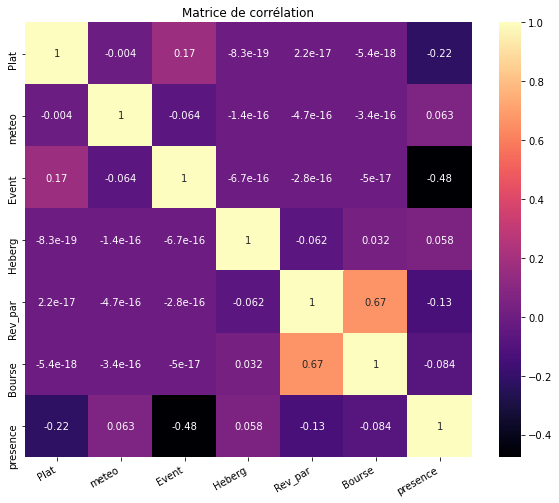

In [21]:
fig, axes = plt.subplots(figsize= (10,8))
sns.heatmap(trainC.corr(), annot=True, cmap='magma')
plt.xticks(rotation=30, ha='right')
plt.title("Matrice de corrélation")
plt.show()

In [6]:
 from sklearn.linear_model import LogisticRegression

In [76]:
trainCY = trainC["presence"]

In [75]:
trainCX = trainC.drop(["presence"], axis =1)

In [24]:
testCY = testC["presence"]
testCX = testC.drop(["presence","meteo","Heberg", "Bourse"], axis =1)

In [25]:
model = LogisticRegression()
model.fit(trainCX,trainCY)

LogisticRegression()

In [27]:
print('Score du modele =', model.score(trainCX,trainCY))

Score du modele = 0.7355833333333334


[[40586  4550]
 [33526 65338]]


<AxesSubplot:>

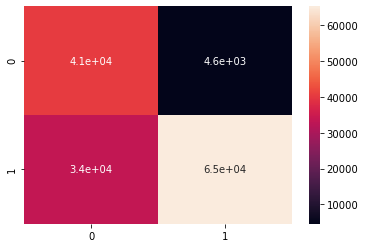

In [28]:
cm = confusion_matrix(model.predict(trainCX),trainCY)
print(cm)
sns.heatmap(cm, annot=True)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
modelKnn = KNeighborsClassifier()

In [92]:
modelKnn.fit(trainCX,trainCY)

KNeighborsClassifier()

In [93]:
print('Score du modele =', modelKnn.score(trainCX,trainCY))

Score du modele = 0.669


[[52614 26166]
 [21498 43722]]


<AxesSubplot:>

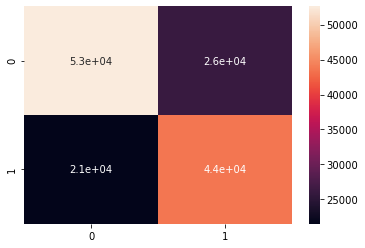

In [94]:
cm = confusion_matrix(modelKnn.predict(trainCX),trainCY)
print(cm)
sns.heatmap(cm, annot=True)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
import tensorflow as tf

In [30]:
from keras.models import Sequential
ANN_model = Sequential()

In [31]:
ANN_model.add(InputLayer(input_shape=(6, )))
# No hidden layers
ANN_model.add(Dense(1, activation='sigmoid'))

In [32]:
ANN_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [33]:
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = ANN_model.fit(trainCX,trainCY, 
                        epochs=10, batch_size=32,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/10
3600/3600 [==============================] - 32s 1ms/step - loss: 0.8422 - accuracy: 0.4656 - val_loss: 0.5141 - val_accuracy: 0.7715
Epoch 2/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5780 - accuracy: 0.7186 - val_loss: 0.4347 - val_accuracy: 0.7662
Epoch 3/10
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5360 - accuracy: 0.7194 - val_loss: 0.4164 - val_accuracy: 0.7660
Epoch 4/10
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5200 - accuracy: 0.7206 - val_loss: 0.4101 - val_accuracy: 0.7680
Epoch 5/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5138 - accuracy: 0.7209 - val_loss: 0.4077 - val_accuracy: 0.7680
Epoch 6/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5114 - accuracy: 0.7211 - val_loss: 0.4068 - val_accuracy: 0.7680
Epoch 7/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5105 - accuracy: 0.7209 - val_loss: 0.4065 - val_accuracy

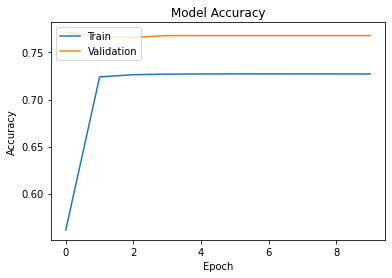

In [35]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

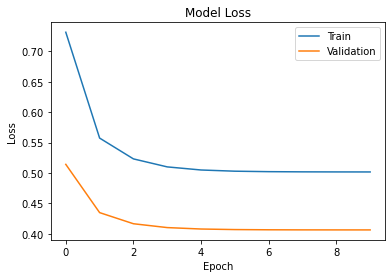

In [36]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [37]:
test_loss, test_acc = ANN_model.evaluate(testCX, testCY)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2250/2250 [==============================] - 2s 995us/step - loss: 0.4833 - accuracy: 0.7348
Test loss: 0.48333001136779785
Test accuracy: 0.7348194718360901


C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[37583  1777]
 [36529 68111]]


<AxesSubplot:>

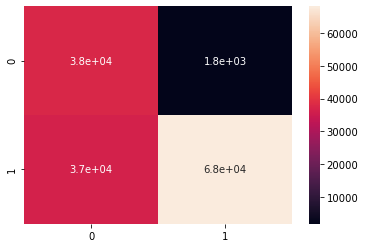

In [38]:
cm = confusion_matrix(ANN_model.predict_classes(trainCX),trainCY)
print(cm)
sns.heatmap(cm, annot=True)

In [39]:
result = ANN_model.predict_classes(testCX)

C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
listTest = []
for i in testCY:
    listTest.append(i)

In [41]:
listreg = result.tolist()
listlog = []
for i in listreg:
    listlog.append(i[0])

In [42]:
res = {
    "date": classfile[144000:].date,
    "Test" : listTest,
  "pred" : listlog
}
respred = pd.DataFrame(res)

In [43]:
respred

,date,Test,pred
144000,21-08-2021,0,1
144001,21-08-2021,1,1
144002,21-08-2021,0,1
144003,21-08-2021,0,1
144004,21-08-2021,0,1
...,...,...,...
215995,15-08-2022,1,1
215996,15-08-2022,1,1
215997,15-08-2022,0,1
215998,15-08-2022,1,1


In [44]:
gb = respred.groupby('date').sum()

In [45]:
gb

,Test,pred
date,,
01-01-2022,0,0
01-02-2022,134,192
01-03-2022,123,192
01-04-2022,0,0
01-05-2022,0,0
...,...,...
31-05-2022,114,192
31-07-2022,117,192
31-08-2021,123,192


In [47]:
gb.to_excel('classification/resultLOG.xlsx')


In [48]:
readf = pd.read_excel("classification/resultLOG.xlsx")

In [51]:
readf= readf.drop(['date'], axis=1)

<AxesSubplot:>

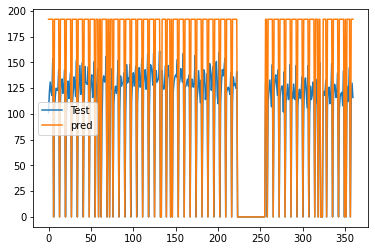

In [52]:
readf.plot()

In [53]:
from keras.models import Sequential

In [87]:
from keras import layers, Model, optimizers, regularizers
input = layers.Input(shape=(6,))
tmp = layers.Dense(200, activation='sigmoid')(input)
output = layers.Dense(2, activation='softmax')(tmp)
model = Model(input, output)
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               1400      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 402       
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
history = model.fit(trainCX,trainCY, 
                        epochs=10, batch_size=100,
                        )

Epoch 1/10


ValueError: in user code:

    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Laghoub\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\losses.py:1630 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Laghoub\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Laghoub\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (100, 1) and (100, 2) are incompatible
